In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler

# suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('UniversalBank.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [37]:
#dropping unnecessary columns
df.drop('ID', axis=1, inplace=True)
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [38]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [40]:
categorical_var =['ZIP Code','Education','Securities Account', 'CD Account', 'Online', 'CreditCard']
target_var = ['Personal Loan']

numerical_var = set(df.columns)-set(categorical_var)-set(target_var)
numerical_var

{'Age', 'CCAvg', 'Experience', 'Family', 'Income', 'Mortgage'}

In [41]:
len(df['ZIP Code'].value_counts().index)

467

In [42]:
#Dropping Categorical Variables with Multiple Levels:
high_cardinality = []
for col in categorical_var:
    if(len(df[col].value_counts().index) > 100):
        high_cardinality.append(col)
high_cardinality


['ZIP Code']

In [43]:
df.drop('ZIP Code', axis=1, inplace=True)
categorical_var = set(categorical_var) - set(['ZIP Code'])

In [44]:
df.isnull()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

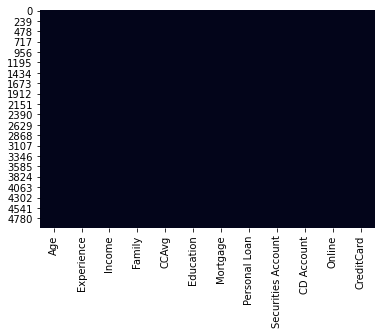

In [45]:
#examining missing values using heatmap
sns.heatmap(df.isnull(), cbar=False)

0    4520
1     480
Name: Personal Loan, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


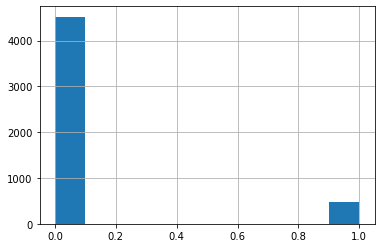

In [46]:
#accessing target variable distribution

print(df['Personal Loan'].value_counts())
print(df['Personal Loan'].hist())

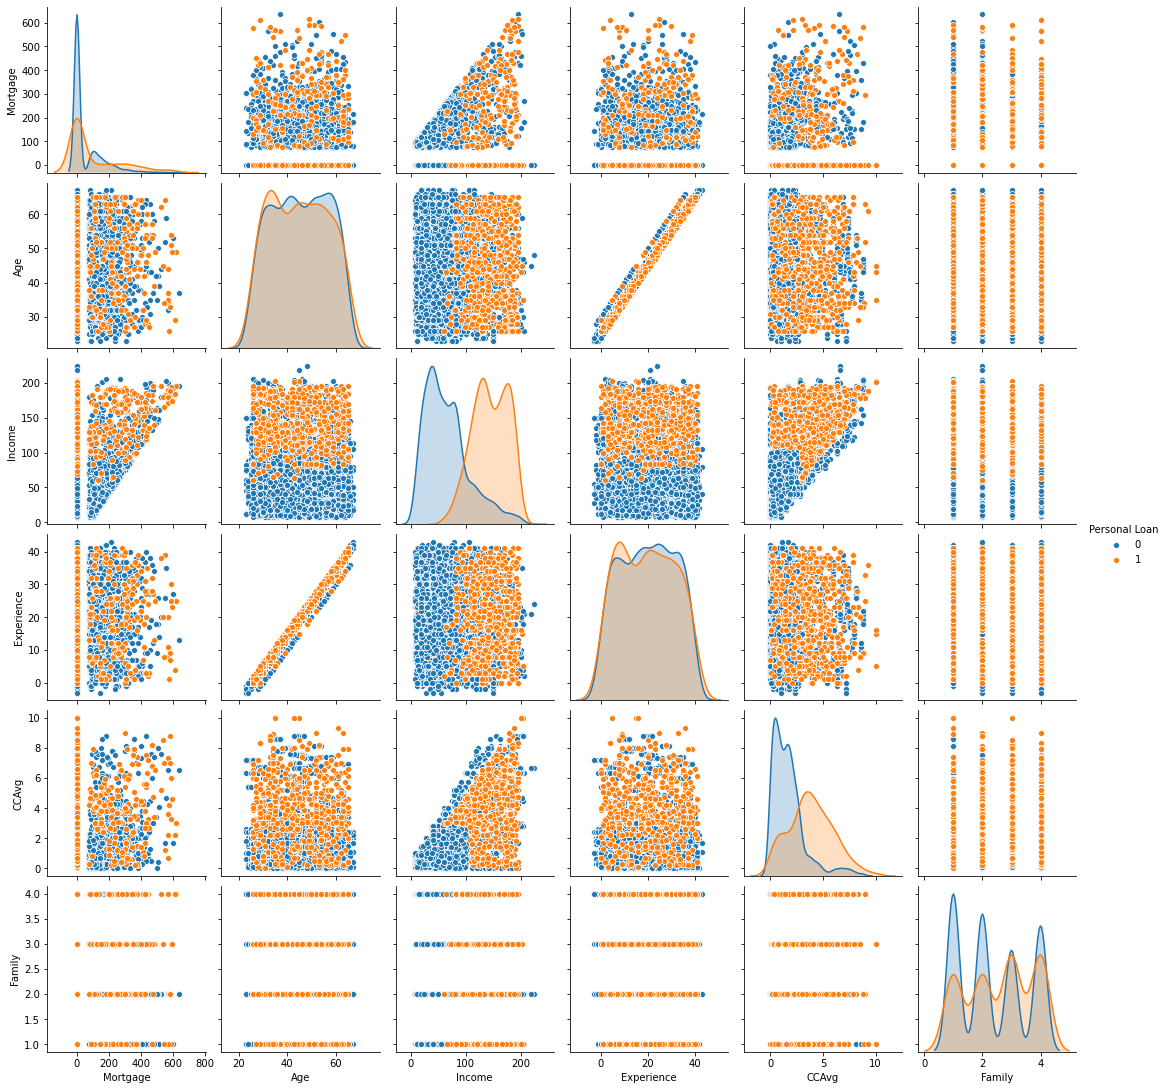

In [29]:
#visualizing numerical variables
sns.pairplot(df[(set(df.columns)-set(categorical_var))],hue='Personal Loan')


In [47]:
df.corr()['Personal Loan'].sort_values(ascending=False)

Personal Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities Account    0.021954
Online                0.006278
CreditCard            0.002802
Experience           -0.007413
Age                  -0.007726
Name: Personal Loan, dtype: float64

In [48]:
#data preprocessing 
for i in categorical_var:
    print(i)
    print(df[i].value_counts())

CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64
CD Account
0    4698
1     302
Name: CD Account, dtype: int64
Education
1    2096
3    1501
2    1403
Name: Education, dtype: int64
Online
1    2984
0    2016
Name: Online, dtype: int64
Securities Account
0    4478
1     522
Name: Securities Account, dtype: int64


In [49]:
#creating dummy variable for education
edu_dummy_df = pd.get_dummies(df['Education'], drop_first=True)
df.drop(['Education'], axis=1, inplace=True)
df = pd.concat([df, edu_dummy_df], axis=1)

In [50]:
df.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,2,3
0,25,1,49,4,1.6,0,0,1,0,0,0,0,0
1,45,19,34,3,1.5,0,0,1,0,0,0,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,1,0


In [51]:
df.rename(columns={2:'Education_2',3:'Education_3'}, inplace=True)

In [53]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Education_2', 'Education_3'],
      dtype='object')

In [54]:
df[['Education_3','Education_2']] = df[['Education_3','Education_2']].astype({'Education_3': 'int64','Education_2':'int64'})

In [55]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Education_2             int64
Education_3             int64
dtype: object

In [56]:
X = df.drop(['Personal Loan'], axis=1)
y = df['Personal Loan']

In [58]:
scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)
X_rescaled = pd.DataFrame(X_, columns=X.columns)
X_rescaled.describe()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.507691,0.502274,0.304510,0.465467,0.193794,0.088974,0.104400,0.06040,0.596800,0.294000,0.280600,0.300200
std,0.260526,0.249303,0.213119,0.382554,0.174766,0.160179,0.305809,0.23825,0.490589,0.455637,0.449337,0.458391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.272727,0.282609,0.143519,0.000000,0.070000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.259259,0.333333,0.150000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000
75%,0.727273,0.717391,0.416667,0.666667,0.250000,0.159055,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [59]:
#splitting data 70/30 into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_rescaled,y,test_size= 0.3,random_state=1)

In [60]:
#developing Artificial Neural Network (ANN)
#we will use 'lgbfs' solver type since it works accurately for smaller data types
MLPC_model = MLPClassifier(hidden_layer_sizes=20,activation='logistic',solver='lbfgs',random_state=1)

MLPC_model.fit(X_train,y_train)

mlpc_y_pred = MLPC_model.predict(X_test)

In [61]:
#accesssing model performance

##confusion matrix
print(confusion_matrix(y_test,mlpc_y_pred),"\n")

##classification report
print(classification_report(y_test,mlpc_y_pred),"\n")

##roc_auc score
print("ROC AUC Score: ",roc_auc_score(y_test,mlpc_y_pred))

[[1336   15]
 [  24  125]] 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1351
           1       0.89      0.84      0.87       149

    accuracy                           0.97      1500
   macro avg       0.94      0.91      0.93      1500
weighted avg       0.97      0.97      0.97      1500
 

ROC AUC Score:  0.9139116438730446
